In [ ]:
import numpy as np
import pandas as pd

# load data
here we use available data on scikit-learn

In [ ]:
from sklearn.datasets import load_breast_cancer

X , y = load_breast_cancer(return_X_y = True)

In [ ]:
data = load_breast_cancer()

# Split Data set into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

455
114


# preprocessing
## missing values
## transform categorical variables
here, we have a complete dataset and numerical values
we move to the next step




# Select an algorithm
## RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42)

### Advanced task
Use GridSearch to determine the optimal hyperparameters for the model.
Identify and select the three most crucial ones.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Code here

## Train model


In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

## make predictions on testing data

In [ ]:
y_pred = rf.predict(X_test)


# Evaluate the performance of the
## confusion matrix

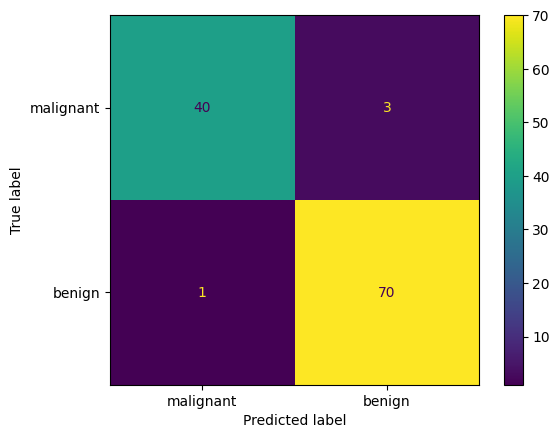

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
# compute the confision matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.target_names)
disp.plot()

## Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Choose another algorithm : DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)

## Train the model

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

# Make predicsions

In [ ]:
y_pred = dtc.predict(X_test)

# Evaluation
## confusion matrix

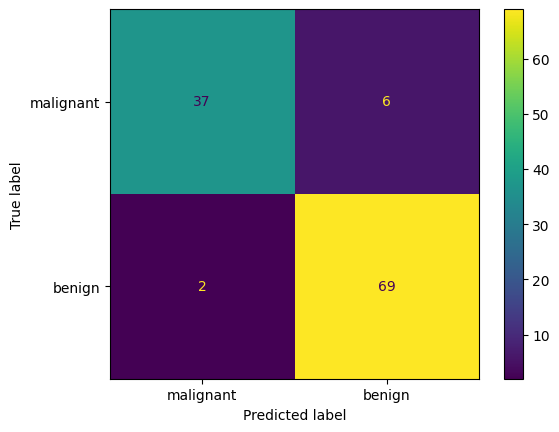

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
# compute the confision matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.target_names)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



### plot the tree to identify decision rules

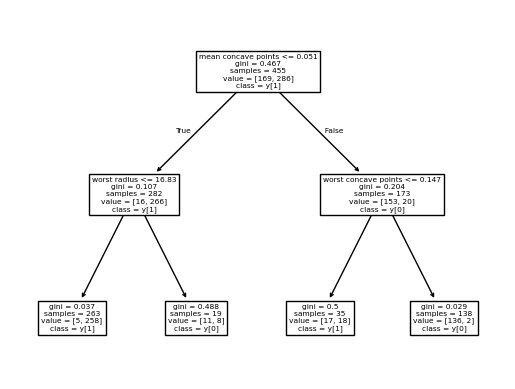

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plot_tree(dtc, class_names=True , feature_names=data.feature_names)
plt.show()

this tree is not exploitable; We have a lot a of decision rules.
We must fine tune the hyperparameters

In [ ]:
#define the estimator to use
estimator = DecisionTreeClassifier()

# select values of hyperparameters (of the estimator) to optimize
params_grid = {
                "max_depth":[3,5, 6], # we can select more that 2 values
                "min_samples_leaf":[20,10,5]
               }
# specify how we evaluate the model to select the best hyperparameters
scoring = "accuracy"

# initiate the gridsearch class
dtc = GridSearchCV(estimator = estimator,param_grid = params_grid, scoring = scoring)


## train the model with gridsearch

In [ ]:
dtc.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 6],
                         'min_samples_leaf': [20, 10, 5]},
             scoring='accuracy')

In [ ]:
print("the best score is ",dtc.best_score_)
print("the best parameters are ",dtc.best_params_)
print("all results :\n",dtc.cv_results_)


the best score is  0.9340659340659341
the best parameters are  {'max_depth': 3, 'min_samples_leaf': 5}
all results :
 {'mean_fit_time': array([0.00479474, 0.00492492, 0.00494142, 0.00499234, 0.00603833,
       0.00678973, 0.00518379, 0.00619502, 0.00650749]), 'std_fit_time': array([0.00047432, 0.00022962, 0.00017745, 0.00033082, 0.00041194,
       0.00026456, 0.00018235, 0.00051739, 0.00021612]), 'mean_score_time': array([0.00100775, 0.00093551, 0.00092292, 0.00088429, 0.00094142,
       0.0009275 , 0.00093632, 0.00094409, 0.00085797]), 'std_score_time': array([1.41960308e-04, 4.37931254e-05, 7.85725781e-05, 1.86045948e-05,
       1.31076854e-04, 3.50951501e-05, 1.33701636e-04, 1.19691864e-04,
       1.28344510e-05]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 6, 6, 6],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=999999), 'param_min_samples_leaf': masked_array(data=[20, 10, 5, 20, 10, 5, 20, 10, 5]

## Gradient Boosting algorithm

In [ ]:
# code here

# Model selection

You have several trained classification models for a medical diagnosis problem. Your goal is to evaluate these models and identify the best one based on an appropriate metric.  

## 1. Selecting the Metric  
- Choose a relevant metric to evaluate the quality of the models in this context.  
- Justify your choice by explaining why this metric is more suitable than others (e.g., accuracy, precision, recall, F1-score, AUC-ROC).  

## 2. Comparing the Models  
- Using the selected metric, compare the performance of the provided models.  
- Identify the model that achieves the best results according to your chosen criterion.  
- Discuss the results and explain whether they align with the needs of medical diagnosis (e.g., handling imbalanced data, cost of false positives/false negatives).  
